# Sismique passive - Munckenbach 2021

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read, UTCDateTime
from obspy.signal.konnoohmachismoothing import konno_ohmachi_smoothing
import glob
import datetime

## H/V

#### Read data + preprocessing

In [156]:
path_data = "/Users/jvergne/Documents/Enseignement/2021-2022/3A_Stage_Muckenbach/Data_samples/"
station = "453001845"
id_group = "3"

fact_decim = 5 # decimation factor

/Users/jvergne/anaconda/envs/py35/lib/python3.5/site-packages/obspy/core/trace.py:2111: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(self.data.dtype, float):


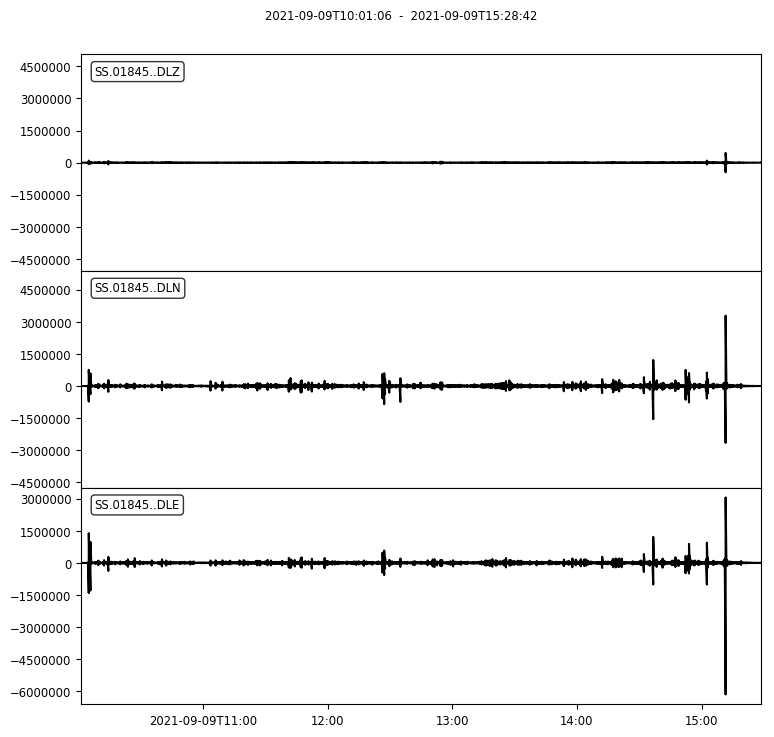

In [157]:
S = read(path_data+station+"..0."+id_group+"*.?.miniseed")
S.detrend("demean")
S.taper(0.05)
S.decimate(fact_decim)
S.plot()

#### Define the time range

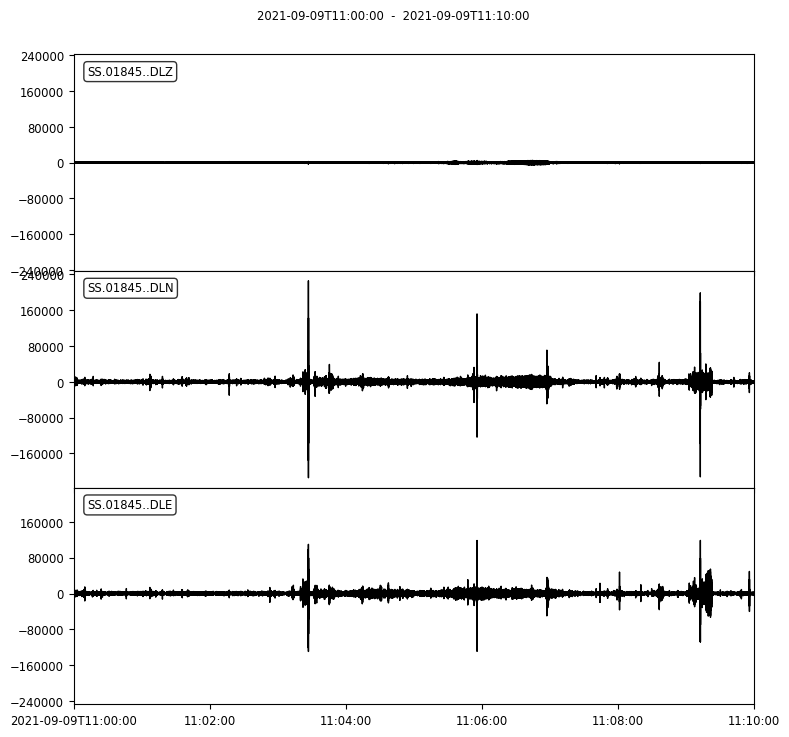

In [158]:
tstart = UTCDateTime(2021,9,9,11,0,0)
#tstop = UTCDateTime(2021,9,9,12,0,0)
tstop = tstart+ 60*10
step = 60

Scut = S.slice(tstart,tstop)
Scut.plot()

#### Compute the H/V for each segment

In [159]:
fmin = 5
fmax = 50
fact_smooth = 50

T = np.arange(tstart,tstop,step)
HV = list()
for t in T:
    print(t)
    Scut = S.slice(t,t+step)
    Scut.sort(keys=['channel'])
    npts = Scut[0].stats.npts
    dt = Scut[0].stats.delta

    #Scut.plot()
    TF = np.zeros((3,npts))
    for i,T in enumerate(Scut):
        TF[i,:] = np.abs(np.fft.fft(T.data))
    f = np.fft.fftfreq(npts,dt)
    ii = np.where((f>=fmin) & (f<=fmax))[0]
    TF = TF[:,ii]
    f = f[ii]
    
    TFs = konno_ohmachi_smoothing(TF,f,bandwidth=fact_smooth)
    HV.append(np.sqrt(0.5*(TFs[0,:]**2+TFs[1,:]**2)) / TFs[2,:])
HV = np.array(HV)

2021-09-09T11:00:00.000000Z
2021-09-09T11:01:00.000000Z
2021-09-09T11:02:00.000000Z
2021-09-09T11:03:00.000000Z
2021-09-09T11:04:00.000000Z
2021-09-09T11:05:00.000000Z
2021-09-09T11:06:00.000000Z
2021-09-09T11:07:00.000000Z
2021-09-09T11:08:00.000000Z
2021-09-09T11:09:00.000000Z


#### Compute the geometric mean of H/V and plot

Text(0,0.5,'H/V')

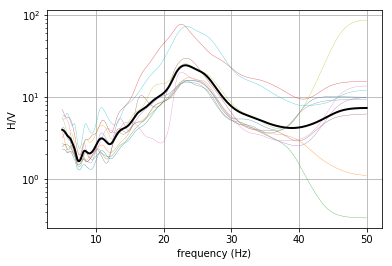

In [160]:
HVs = np.power(10,np.sum(np.log10(HV),axis=0)/np.shape(HV)[0])
for hv in HV : 
    plt.semilogy(f,hv,linewidth=0.3)
plt.semilogy(f,HVs,linewidth=2,color='k')
plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('H/V')

## Analyse d'antenne